# Lab 8: PageRank

In this assignment, we will learn how to compute the importance score of nodes in a graph by using the PageRank method.

## Generate a graph

Here, we use [NetworkX](https://networkx.org/) to generate a directed graph. Then, we will apply PageRank method to this graph. 

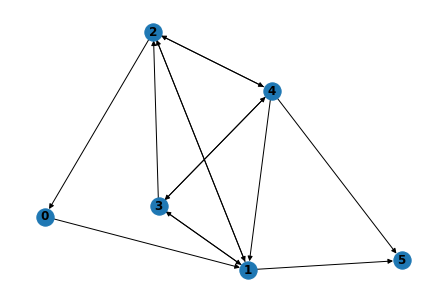

#nodes: 6, #edges: 14
node-0, #in_degrees 1, #out_degrees 1
node-1, #in_degrees 4, #out_degrees 3
node-2, #in_degrees 3, #out_degrees 3
node-3, #in_degrees 2, #out_degrees 3
node-4, #in_degrees 2, #out_degrees 4
node-5, #in_degrees 2, #out_degrees 0
[[0 1 0 0 0 0]
 [0 0 1 1 0 1]
 [1 1 0 0 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 0 0]]


In [50]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# generate a directed graph from the given adjacency matrix
A = np.array([[0, 1, 0, 0, 0, 0],
             [0, 0, 1, 1, 0, 1],
             [1, 1, 0, 0, 1, 0],
             [0, 1, 1, 0, 1, 0],
             [0, 1, 1, 1, 0, 1],
             [0, 0, 0, 0, 0, 0]])

D = nx.from_numpy_matrix(A, create_using=nx.DiGraph)

nx.draw(D, with_labels=True, font_weight='bold')
plt.show()

print('#nodes: {}, #edges: {}'.format(D.number_of_nodes(), D.number_of_edges()))

# output the in_degrees and out_degrees of each node
for idx in range(D.number_of_nodes()):
    print('node-{}, #in_degrees {}, #out_degrees {}'.format(idx, D.in_degree(idx), D.out_degree(idx)))

# get the adjacency matrix of graph D
Adj = nx.adjacency_matrix(D).todense()
print(Adj)

## Task 1. Build the transition matrix from the adjacency matrix

In [51]:
# your code to get the transition matrix M
M = Adj/Adj.sum(axis=0)
np.set_printoptions(precision=4)
print("The transition matrix is: \n", M)

The transition matrix is: 
 [[0.     0.25   0.     0.     0.     0.    ]
 [0.     0.     0.3333 0.5    0.     0.5   ]
 [1.     0.25   0.     0.     0.5    0.    ]
 [0.     0.25   0.3333 0.     0.5    0.    ]
 [0.     0.25   0.3333 0.5    0.     0.5   ]
 [0.     0.     0.     0.     0.     0.    ]]


## Task 2. Use the power iteration method to compute the importance score of nodes


* Initialization: initialize the importance score vector $r_{0}=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]$.
* Iterate: $r_{t+1} =  M r_{t}$
* Stop when $\|r_{t+1} - r_{t}\|_1\leq \epsilon$


In [52]:
#The Teaching Assistant said we could choose a value 𝜖 ourselves. Thus, I will choose a value of 0.1 for this

#This is the initial importance score vector r_0, labeled as r_t for future calculations:
r_t = (np.array([[1/6,1/6,1/6,1/6,1/6,1/6]])).T
print("Initial Importance Score Vector: \n", r_t)

#Iterating by finding the dot product between the transition matrix, M, and r_t
r_tplus1 = np.dot(M,r_t)
print("r_t+1: \n", r_tplus1)

#Computing the L1 norm of r_t+1 - r_t:
l1norm = np.linalg.norm((r_tplus1 - r_t), ord = 1)
print("Initial l1norm: ", l1norm)

#Choosing a 𝜖 of 0.1, we go while the l1norm is greater than 0.1. When the l1norm is less than or equal to 0.1, we stop, as instructed and required by the power iteration method
while l1norm > 0.1:
    r_t = (r_tplus1)
    print("New r_t Vector: \n", r_t)
    r_tplus1 = np.dot(M, r_t)
    print("New r_t+1 Vector: \n", r_tplus1)
    l1norm = np.linalg.norm((r_tplus1 - r_t), ord = 1)
    print("Value of l1norm: ", l1norm)
    
print("Importance Score of Nodes: \n", r_tplus1)
    

Initial Importance Score Vector: 
 [[0.1667]
 [0.1667]
 [0.1667]
 [0.1667]
 [0.1667]
 [0.1667]]
r_t+1: 
 [[0.0417]
 [0.2222]
 [0.2917]
 [0.1806]
 [0.2639]
 [0.    ]]
Initial l1norm:  0.5833333333333334
New r_t Vector: 
 [[0.0417]
 [0.2222]
 [0.2917]
 [0.1806]
 [0.2639]
 [0.    ]]
New r_t+1 Vector: 
 [[0.0556]
 [0.1875]
 [0.2292]
 [0.2847]
 [0.2431]
 [0.    ]]
Value of l1norm:  0.23611111111111113
New r_t Vector: 
 [[0.0556]
 [0.1875]
 [0.2292]
 [0.2847]
 [0.2431]
 [0.    ]]
New r_t+1 Vector: 
 [[0.0469]
 [0.2188]
 [0.224 ]
 [0.2448]
 [0.2656]
 [0.    ]]
Value of l1norm:  0.10763888888888887
New r_t Vector: 
 [[0.0469]
 [0.2188]
 [0.224 ]
 [0.2448]
 [0.2656]
 [0.    ]]
New r_t+1 Vector: 
 [[0.0547]
 [0.197 ]
 [0.2344]
 [0.2622]
 [0.2517]
 [0.    ]]
Value of l1norm:  0.07118055555555558
Importance Score of Nodes: 
 [[0.0547]
 [0.197 ]
 [0.2344]
 [0.2622]
 [0.2517]
 [0.    ]]


## Task 3. In the given graph, are there any dead ends?

If there are some dead ends in the given graph, please use the Random Teleports method to re-compute the importance score. In particular, please construct a new transition matrix as follows,

$$G = \beta M + (1-\beta)[\frac{1}{6}]_{6\times 6}$$

Here, $0<\beta<1$. Apply the power iteration method to $G$. Compare the obtained importance score with that obtained in Task 2. 

In [55]:
#Dead ends occur when a node has no outlinks/has an out-degree of 0
for idx in range(D.number_of_nodes()):
    print('node-{}, #out_degrees {}'.format(idx, D.out_degree(idx)))
#Since Node 5 has an out-degree of 0, it is a dead end! We will use Random Teleports to re-compute the important score. 

#Common values for 𝛽 are between .8 and .9. Thus, I will choose a value of .85
𝛽 = .85
G = 𝛽*M + (1-𝛽)*(np.full((6, 6), (1/6) ))
print("The new Transition Matrix, G, is: \n", G)

#With our new transition matrix, we will follow the same procedure performed in 'Task 2' to obtain a new important score:


#The Teaching Assistant said we could choose a value 𝜖 ourselves. Thus, I will choose a value of 0.1 for this, which is the same value I used for Task 2

#This is the initial importance score vector r_0, labeled as G_r_t for future calculations:
G_r_t = (np.array([[1/6,1/6,1/6,1/6,1/6,1/6]])).T
print("Initial Importance Score Vector: \n", G_r_t)

#Iterating by finding the dot product between the transition matrix, G, and G_r_t
G_r_tplus1 = np.dot(G,G_r_t)
print("r_t+1: \n", G_r_tplus1)

#Computing the L1 norm of r_t+1 - r_t:
l1norm = np.linalg.norm((G_r_tplus1 - G_r_t), ord = 1)
print("Initial l1norm: ", l1norm)

#Choosing a 𝜖 of 0.1, we go while the l1norm is greater than 0.1. When the l1norm is less than or equal to 0.1, we stop, as instructed and required by the power iteration method
while l1norm > 0.1:
    G_r_t = (G_r_tplus1)
    print("New r_t Vector: \n", G_r_t)
    G_r_tplus1 = np.dot(G, G_r_t)
    print("New r_t+1 Vector: \n", G_r_tplus1)
    l1norm = np.linalg.norm((G_r_tplus1 - G_r_t), ord = 1)
    print("Value of l1norm: ", l1norm)
    
print("\nImportance Score of Nodes when using a transition matrix 'G': \n", G_r_tplus1)
print("\nImportance Score of Nodes when using a transition matrix 'M': \n", r_tplus1)

#Comparing the obtained importance score to the one obtained in part 2, one notices that, for both scores, the sums of the numbers add to 1 (as they should).
#However, since we removed the dead ends in this iteration, there is no longer an importance score of '0' for node 5, as is seen for the importance score of node 5 in part 2 (when the dead end was not adjusted for).
#Since the obtained importance score using transition matrix G had to, in a sense, increase one of the values for the nodes, all the other values for nodes in the importance score would correspondly decrease slightly in comparison to what they were before (in part 2).

node-0, #out_degrees 1
node-1, #out_degrees 3
node-2, #out_degrees 3
node-3, #out_degrees 3
node-4, #out_degrees 4
node-5, #out_degrees 0
The new Transition Matrix, G, is: 
 [[0.025  0.2375 0.025  0.025  0.025  0.025 ]
 [0.025  0.025  0.3083 0.45   0.025  0.45  ]
 [0.875  0.2375 0.025  0.025  0.45   0.025 ]
 [0.025  0.2375 0.3083 0.025  0.45   0.025 ]
 [0.025  0.2375 0.3083 0.45   0.025  0.45  ]
 [0.025  0.025  0.025  0.025  0.025  0.025 ]]
Initial Importance Score Vector: 
 [[0.1667]
 [0.1667]
 [0.1667]
 [0.1667]
 [0.1667]
 [0.1667]]
r_t+1: 
 [[0.0604]
 [0.2139]
 [0.2729]
 [0.1785]
 [0.2493]
 [0.025 ]]
Initial l1norm:  0.4958333333333334
New r_t Vector: 
 [[0.0604]
 [0.2139]
 [0.2729]
 [0.1785]
 [0.2493]
 [0.025 ]]
New r_t+1 Vector: 
 [[0.0705]
 [0.1888]
 [0.2278]
 [0.2537]
 [0.2343]
 [0.025 ]]
Value of l1norm:  0.17059027777777788
New r_t Vector: 
 [[0.0705]
 [0.1888]
 [0.2278]
 [0.2537]
 [0.2343]
 [0.025 ]]
New r_t+1 Vector: 
 [[0.0651]
 [0.208 ]
 [0.2246]
 [0.2292]
 [0.2481]
 [0.02